# Week 3: Exploring the U.S. Census, part 2 (units, hierarchies, the central spine, ACS)

In [114]:
!pip install -q census us folium geopandas

In [115]:
%config InlineBackend.figure_formats = ["retina"]

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import folium

from census import Census

In [83]:
census = Census("", year=2020)

## Loading geographical data

In [7]:
county_gdf = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2024/COUNTY/tl_2024_us_county.zip").set_index("GEOID")

In [9]:
county_gdf

STATEFP COUNTYFP  COUNTYNS         GEOIDFQ       NAME          NAMELSAD  \
GEOID                                                                           
31039      31      039  00835841  0500000US31039     Cuming     Cuming County   
53069      53      069  01513275  0500000US53069  Wahkiakum  Wahkiakum County   
35011      35      011  00933054  0500000US35011    De Baca    De Baca County   
31109      31      109  00835876  0500000US31109  Lancaster  Lancaster County   
31129      31      129  00835886  0500000US31129   Nuckolls   Nuckolls County   
...       ...      ...       ...             ...        ...               ...   
13123      13      123  00351260  0500000US13123     Gilmer     Gilmer County   
27135      27      135  00659513  0500000US27135     Roseau     Roseau County   
28089      28      089  00695768  0500000US28089    Madison    Madison County   
48227      48      227  01383899  0500000US48227     Howard     Howard County   
54099      54      099  01550056  0500000US54099      Wayne      Wayne County   

      LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND  \
GEOID                                                                  
31039   06      H1  G4020  None   None     None        A  1477563042   
53069   06      H1  G4020  None   None     None        A   680980773   
35011   06      H1  G4020  None   None     None        A  6016818941   
31109   06      H1  G4020   339  30700     None        A  2169269508   
31129   06      H1  G4020  None   None     None        A  1489645201   
...    ...     ...    ...   ...    ...      ...      ...         ...   
13123   06      H1  G4020  None   None     None        A  1103804462   
27135   06      H1  G4020  None   None     None        A  4329782927   
28089   06      H1  G4020   298  27140     None        A  1849796735   
48227   06      H1  G4020  None  13700     None        A  2333034781   
54099   06      H1  G4020   170  26580     None        A  1310547890   

         AWATER     INTPTLAT      INTPTLON  \
GEOID                                        
31039  10772508  +41.9158651  -096.7885168   
53069  61564428  +46.2946377  -123.4244583   
35011  29090018  +34.3592729  -104.3686961   
31109  22850511  +40.7835474  -096.6886584   
31129   1718484  +40.1764918  -098.0468422   
...         ...          ...           ...   
13123  12337139  +34.6905232  -084.4548113   
27135  16924046  +48.7610683  -095.8215042   
28089  72079469  +32.6343703  -090.0341603   
48227   8846149  +32.3034298  -101.4387208   
54099  15816947  +38.1436416  -082.4226659   

                                                geometry  
GEOID                                                     
31039  POLYGON ((-96.55525 41.82892, -96.55524 41.827...  
53069  POLYGON ((-123.72755 46.26449, -123.72755 46.2...  
35011  POLYGON ((-104.89337 34.08894, -104.89337 34.0...  
31109  POLYGON ((-96.68493 40.52330, -96.69219 40.523...  
31129  POLYGON ((-98.27370 40.11840, -98.27374 40.122...  
...                                                  ...  
13123  POLYGON ((-84.30237 34.57832, -84.30329 34.577...  
27135  POLYGON ((-95.25857 48.88666, -95.25707 48.885...  
28089  POLYGON ((-90.14883 32.40026, -90.14890 32.400...  
48227  POLYGON ((-101.18138 32.21252, -101.18138 32.2...  
54099  POLYGON ((-82.30872 38.28106, -82.30874 38.280...  

[3235 rows x 18 columns]

/opt/anaconda3/envs/mggg/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


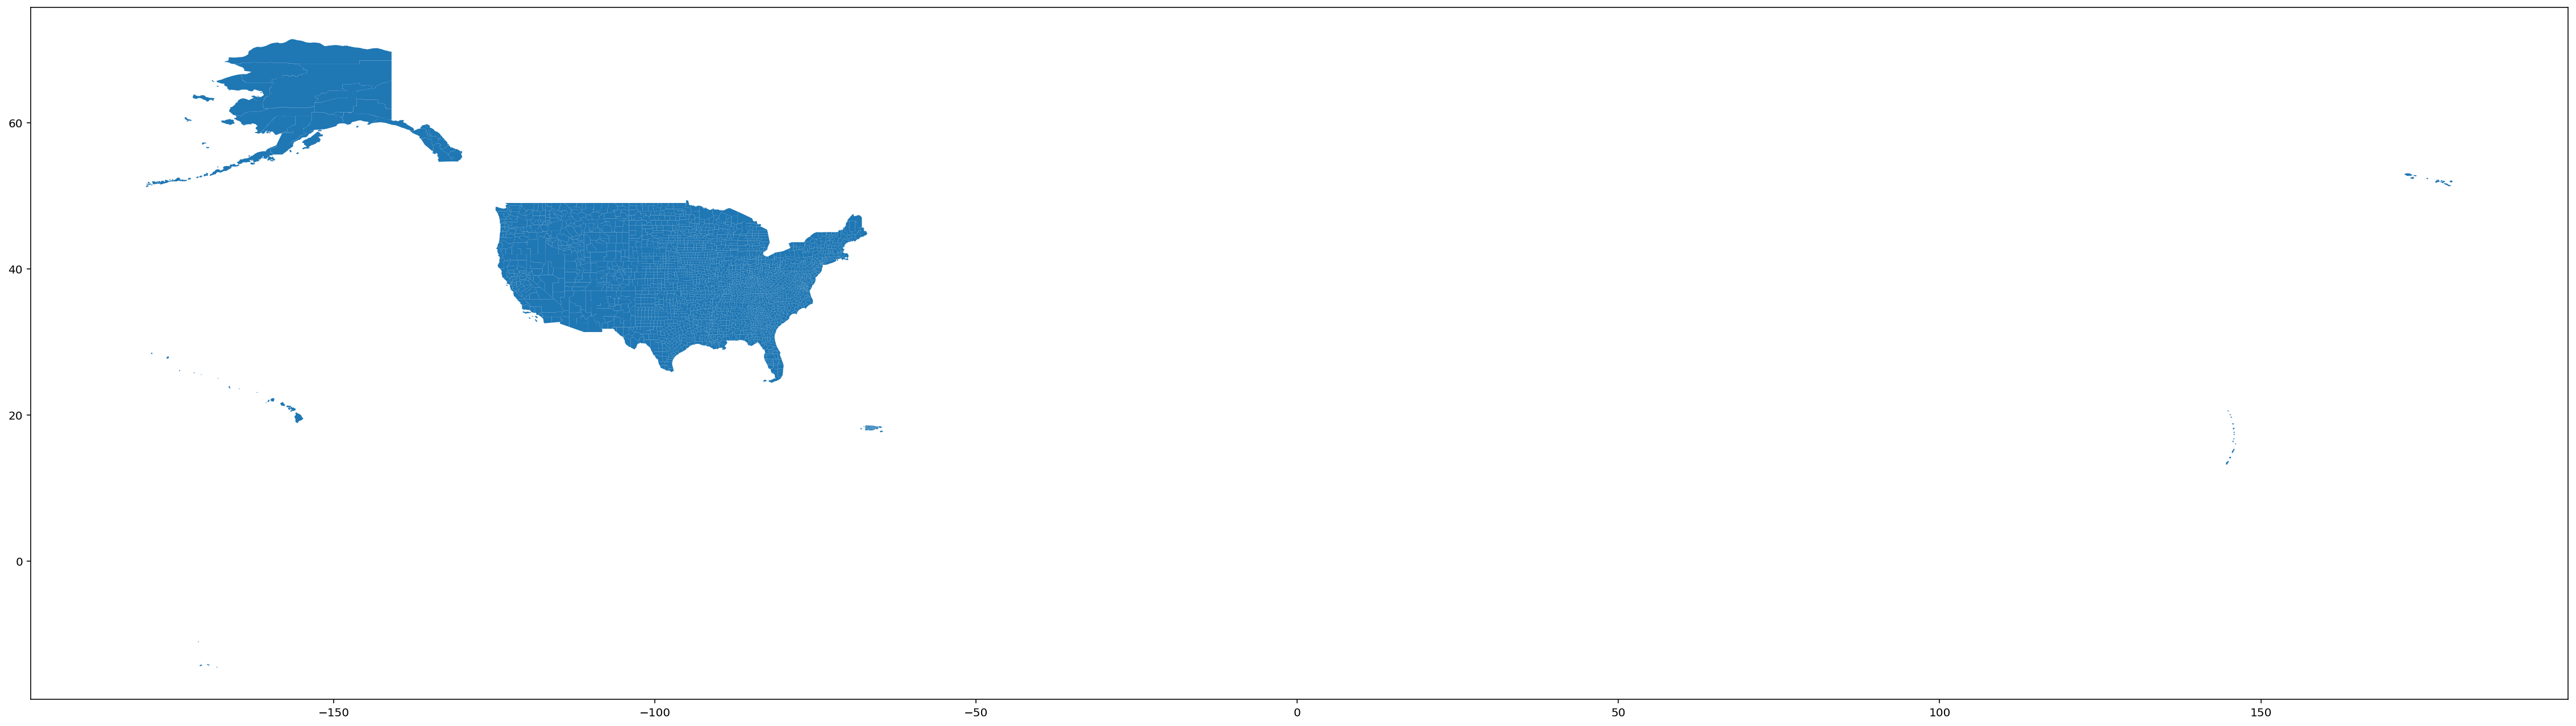

In [27]:
county_gdf.plot(figsize=(40, 80))
plt.show()

In [23]:
# Filter out American Samoa, U.S. Virgin Islands, etc.
continental_gdf = county_gdf[
      (county_gdf.STATEFP <= "56")
    & (county_gdf.STATEFP != "02")  # exclude Alaska
    & (county_gdf.STATEFP != "15")  # exclude Hawaii
]

/opt/anaconda3/envs/mggg/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


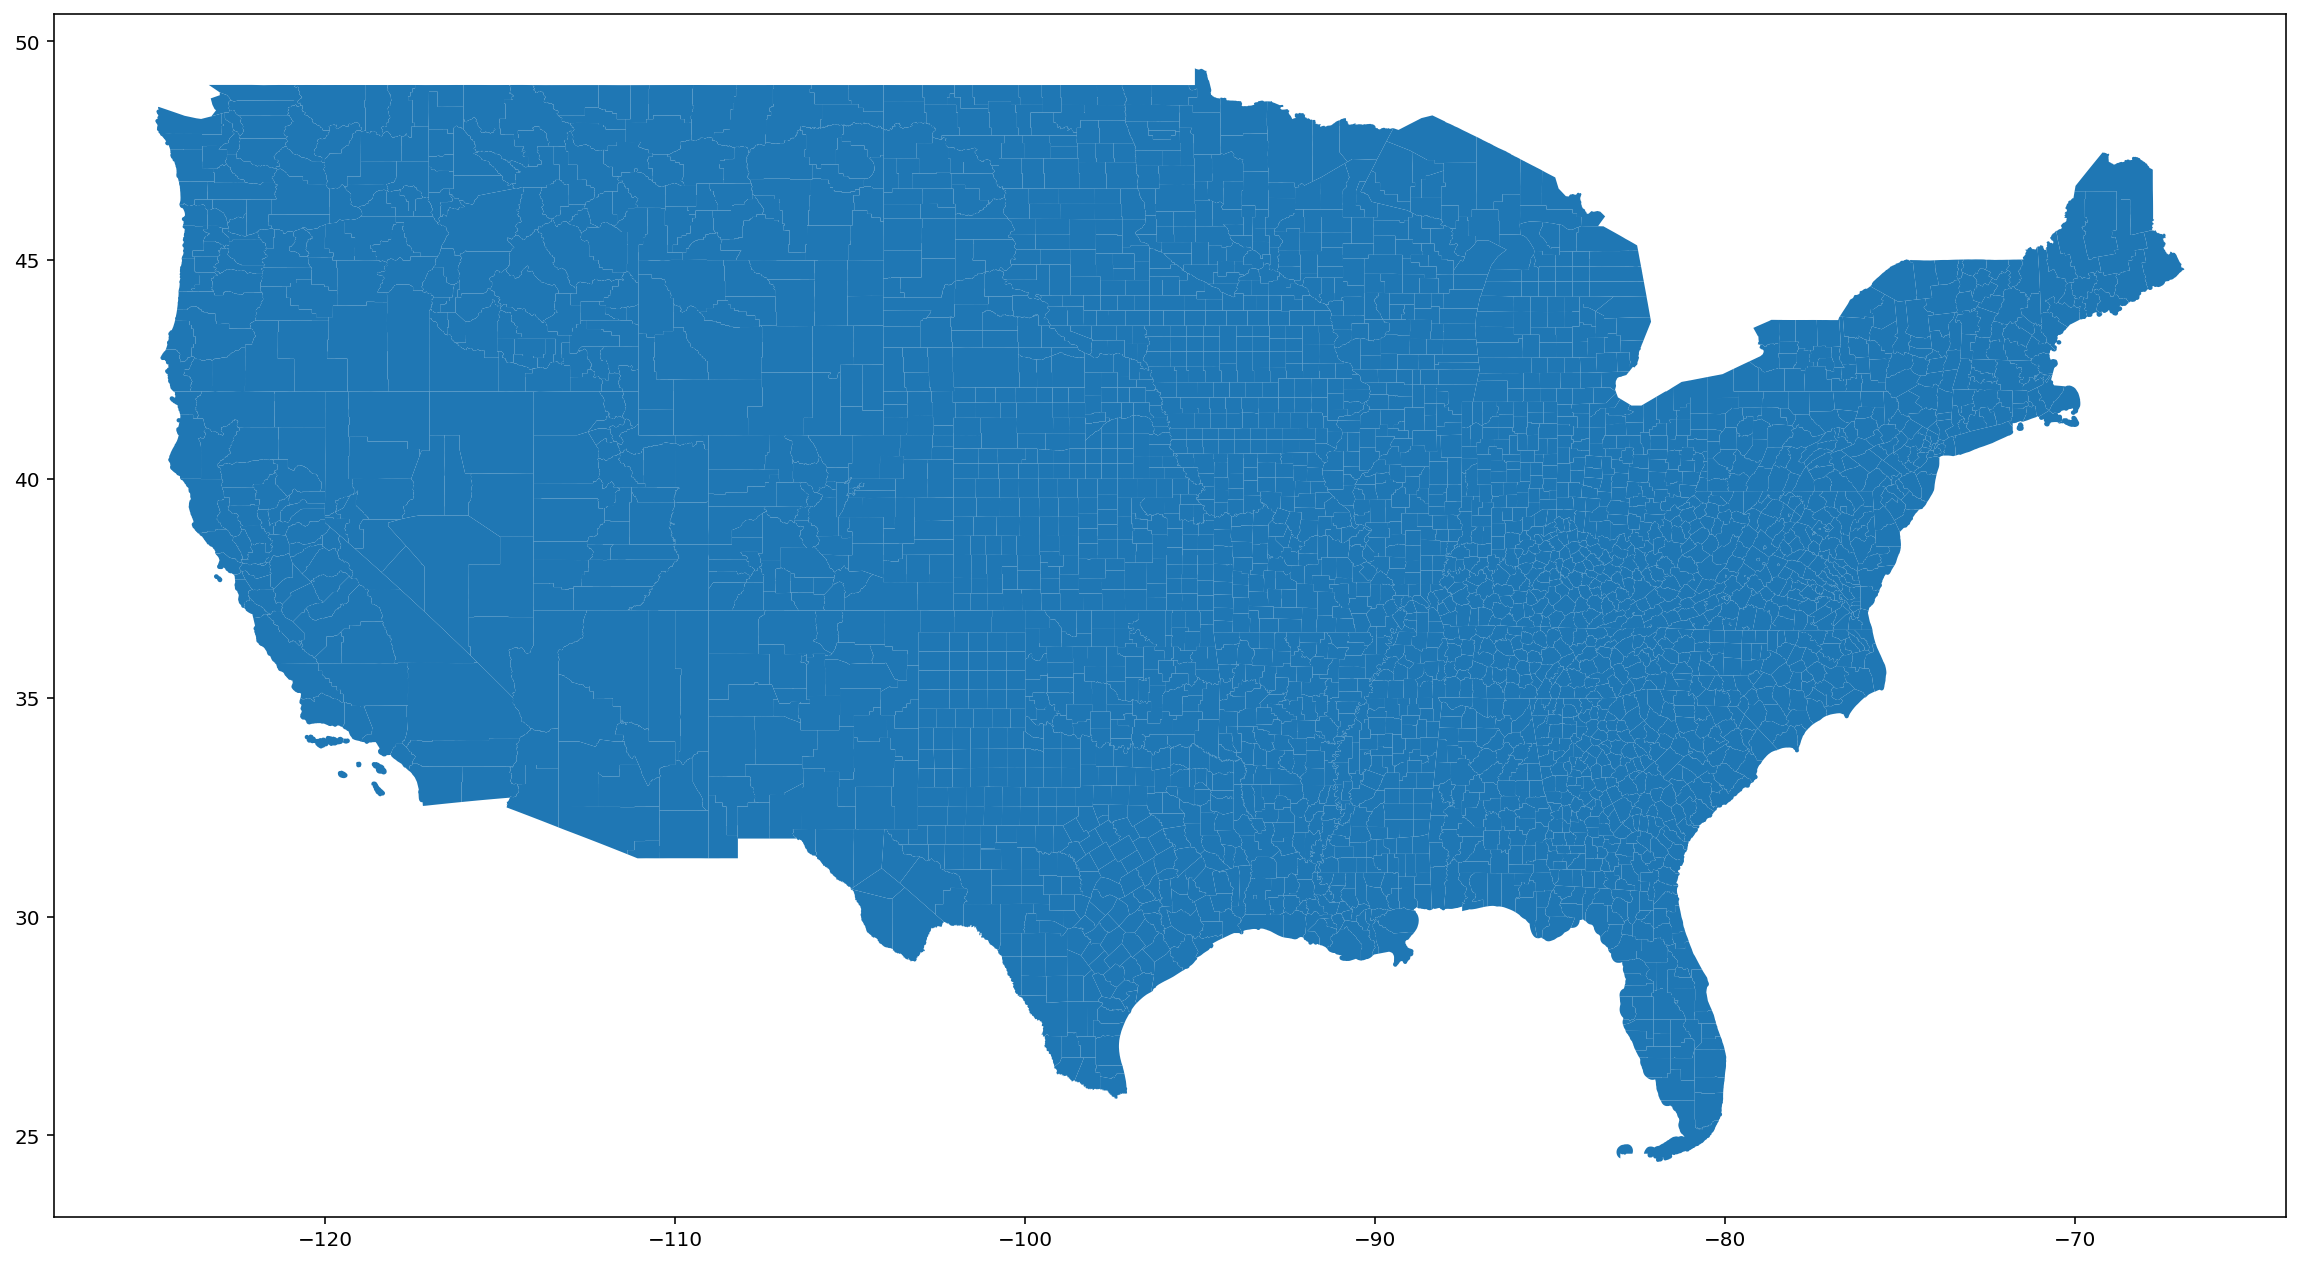

In [28]:
continental_gdf.plot(figsize=(20, 40))
plt.show()

/opt/anaconda3/envs/mggg/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


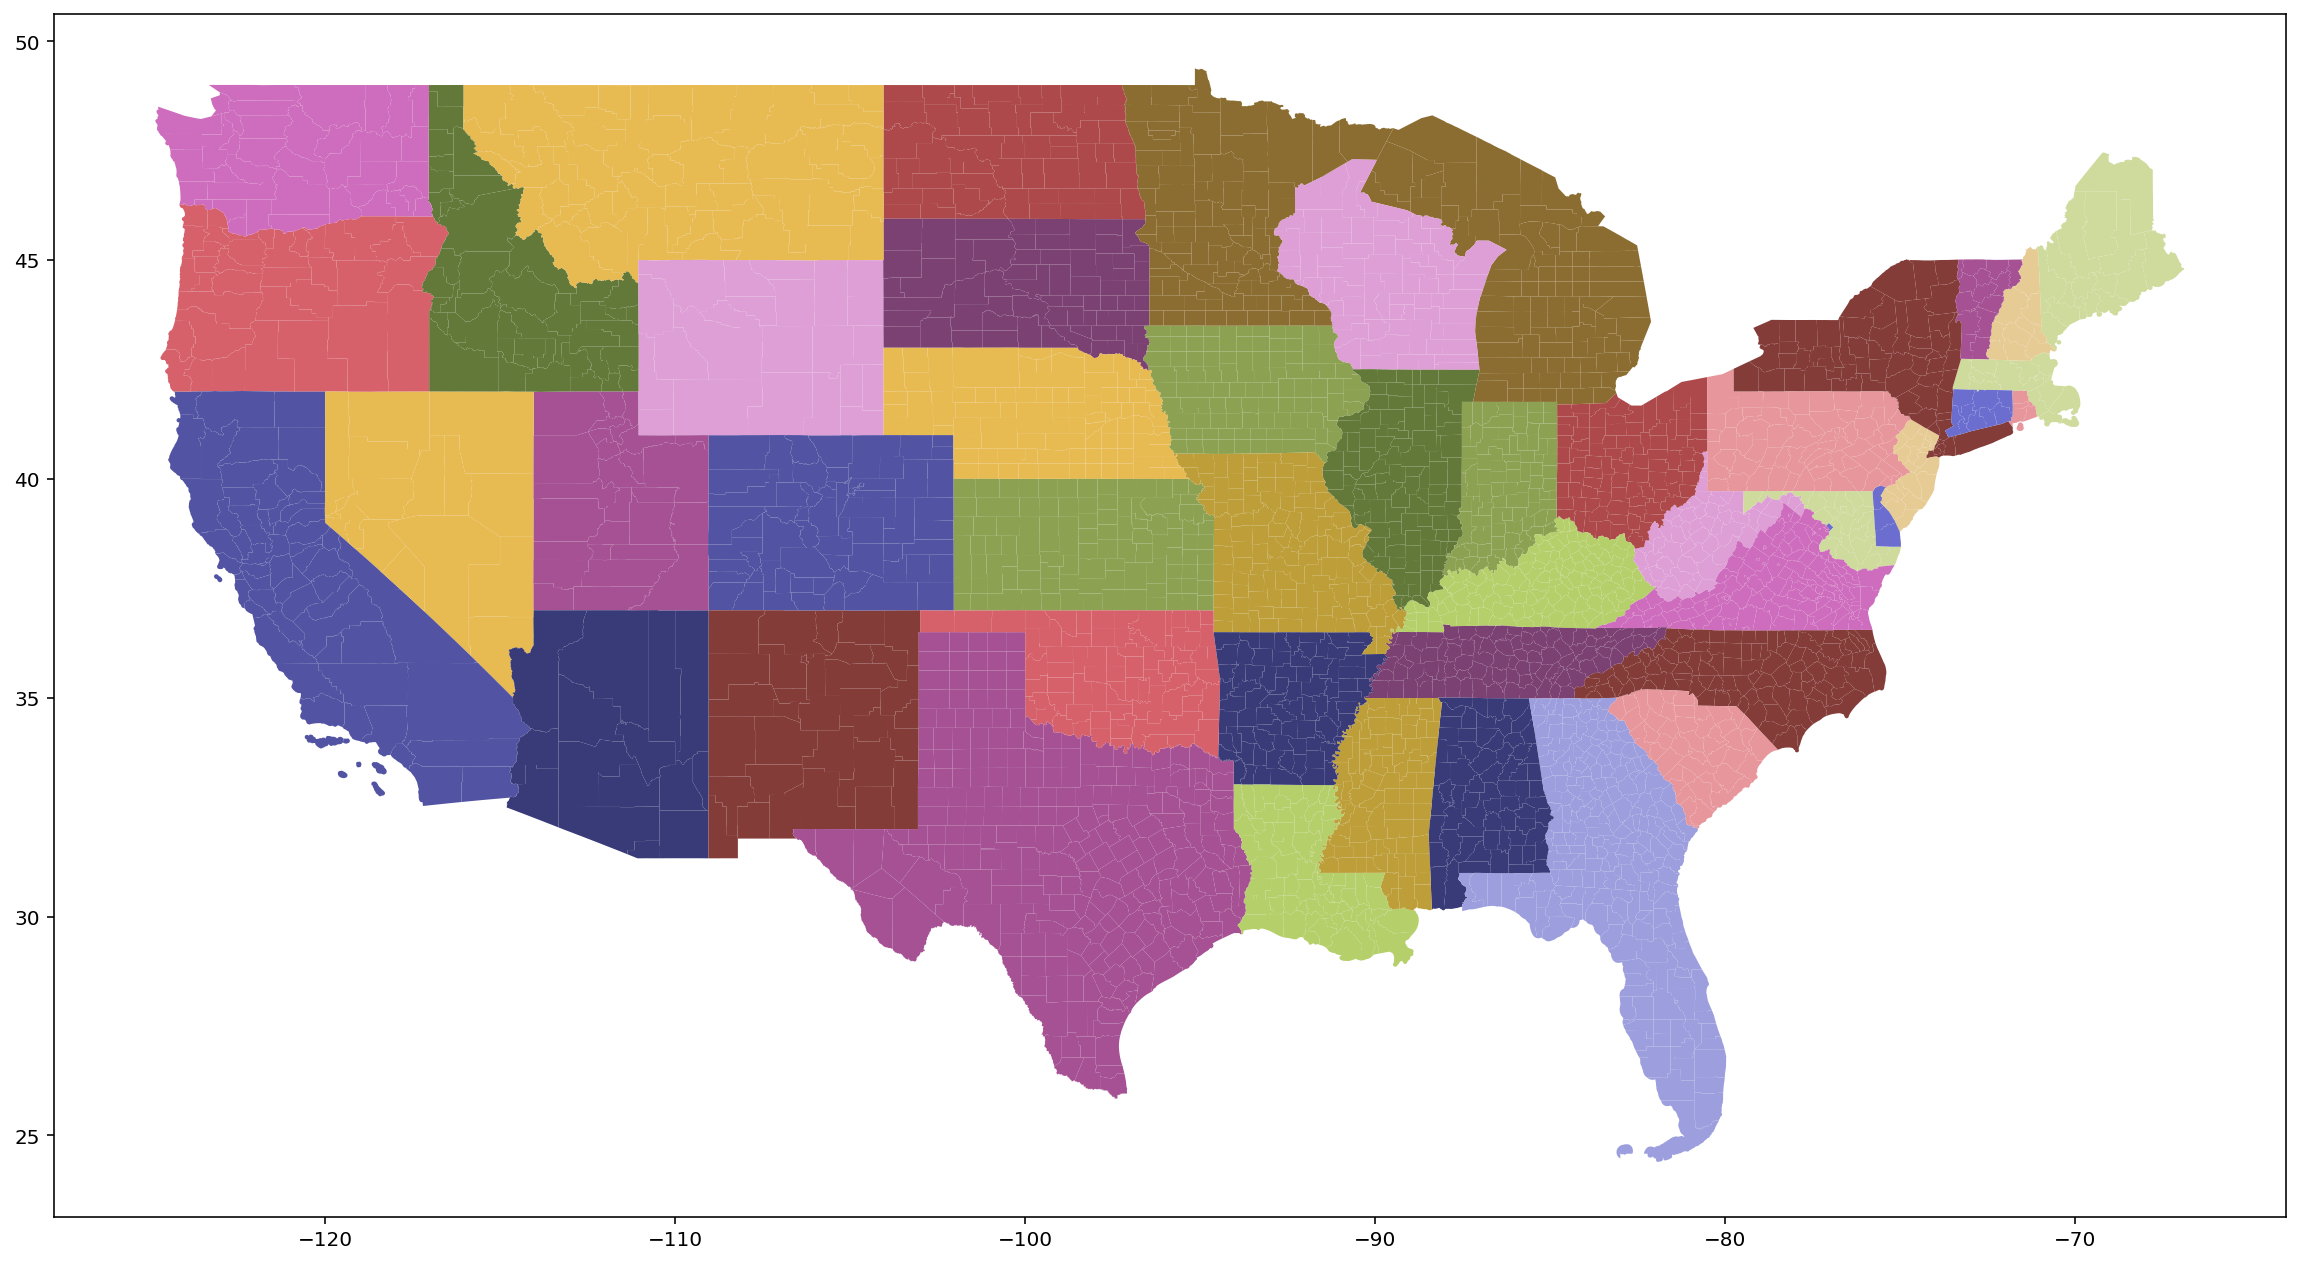

In [33]:
continental_gdf.plot(figsize=(20, 40), column="STATEFP", cmap="tab20b")
plt.show()

## Choosing a map projection

ref: 
* [Choosing the right map projection](https://source.opennews.org/articles/choosing-right-map-projection/)
* [geopandas.GeoDataFrame.plot()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html)

In [34]:
continental_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [35]:
continental_gdf = continental_gdf.to_crs("EPSG:2163")

In [37]:
continental_gdf.crs

<Derived Projected CRS: EPSG:2163>
Name: US National Atlas Equal Area
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - onshore and offshore.
- bounds: (167.65, 15.56, -65.69, 74.71)
Coordinate Operation:
- name: US National Atlas Equal Area
- method: Lambert Azimuthal Equal Area (Spherical)
Datum: Not specified (based on Clarke 1866 Authalic Sphere)
- Ellipsoid: Clarke 1866 Authalic Sphere
- Prime Meridian: Greenwich

/opt/anaconda3/envs/mggg/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


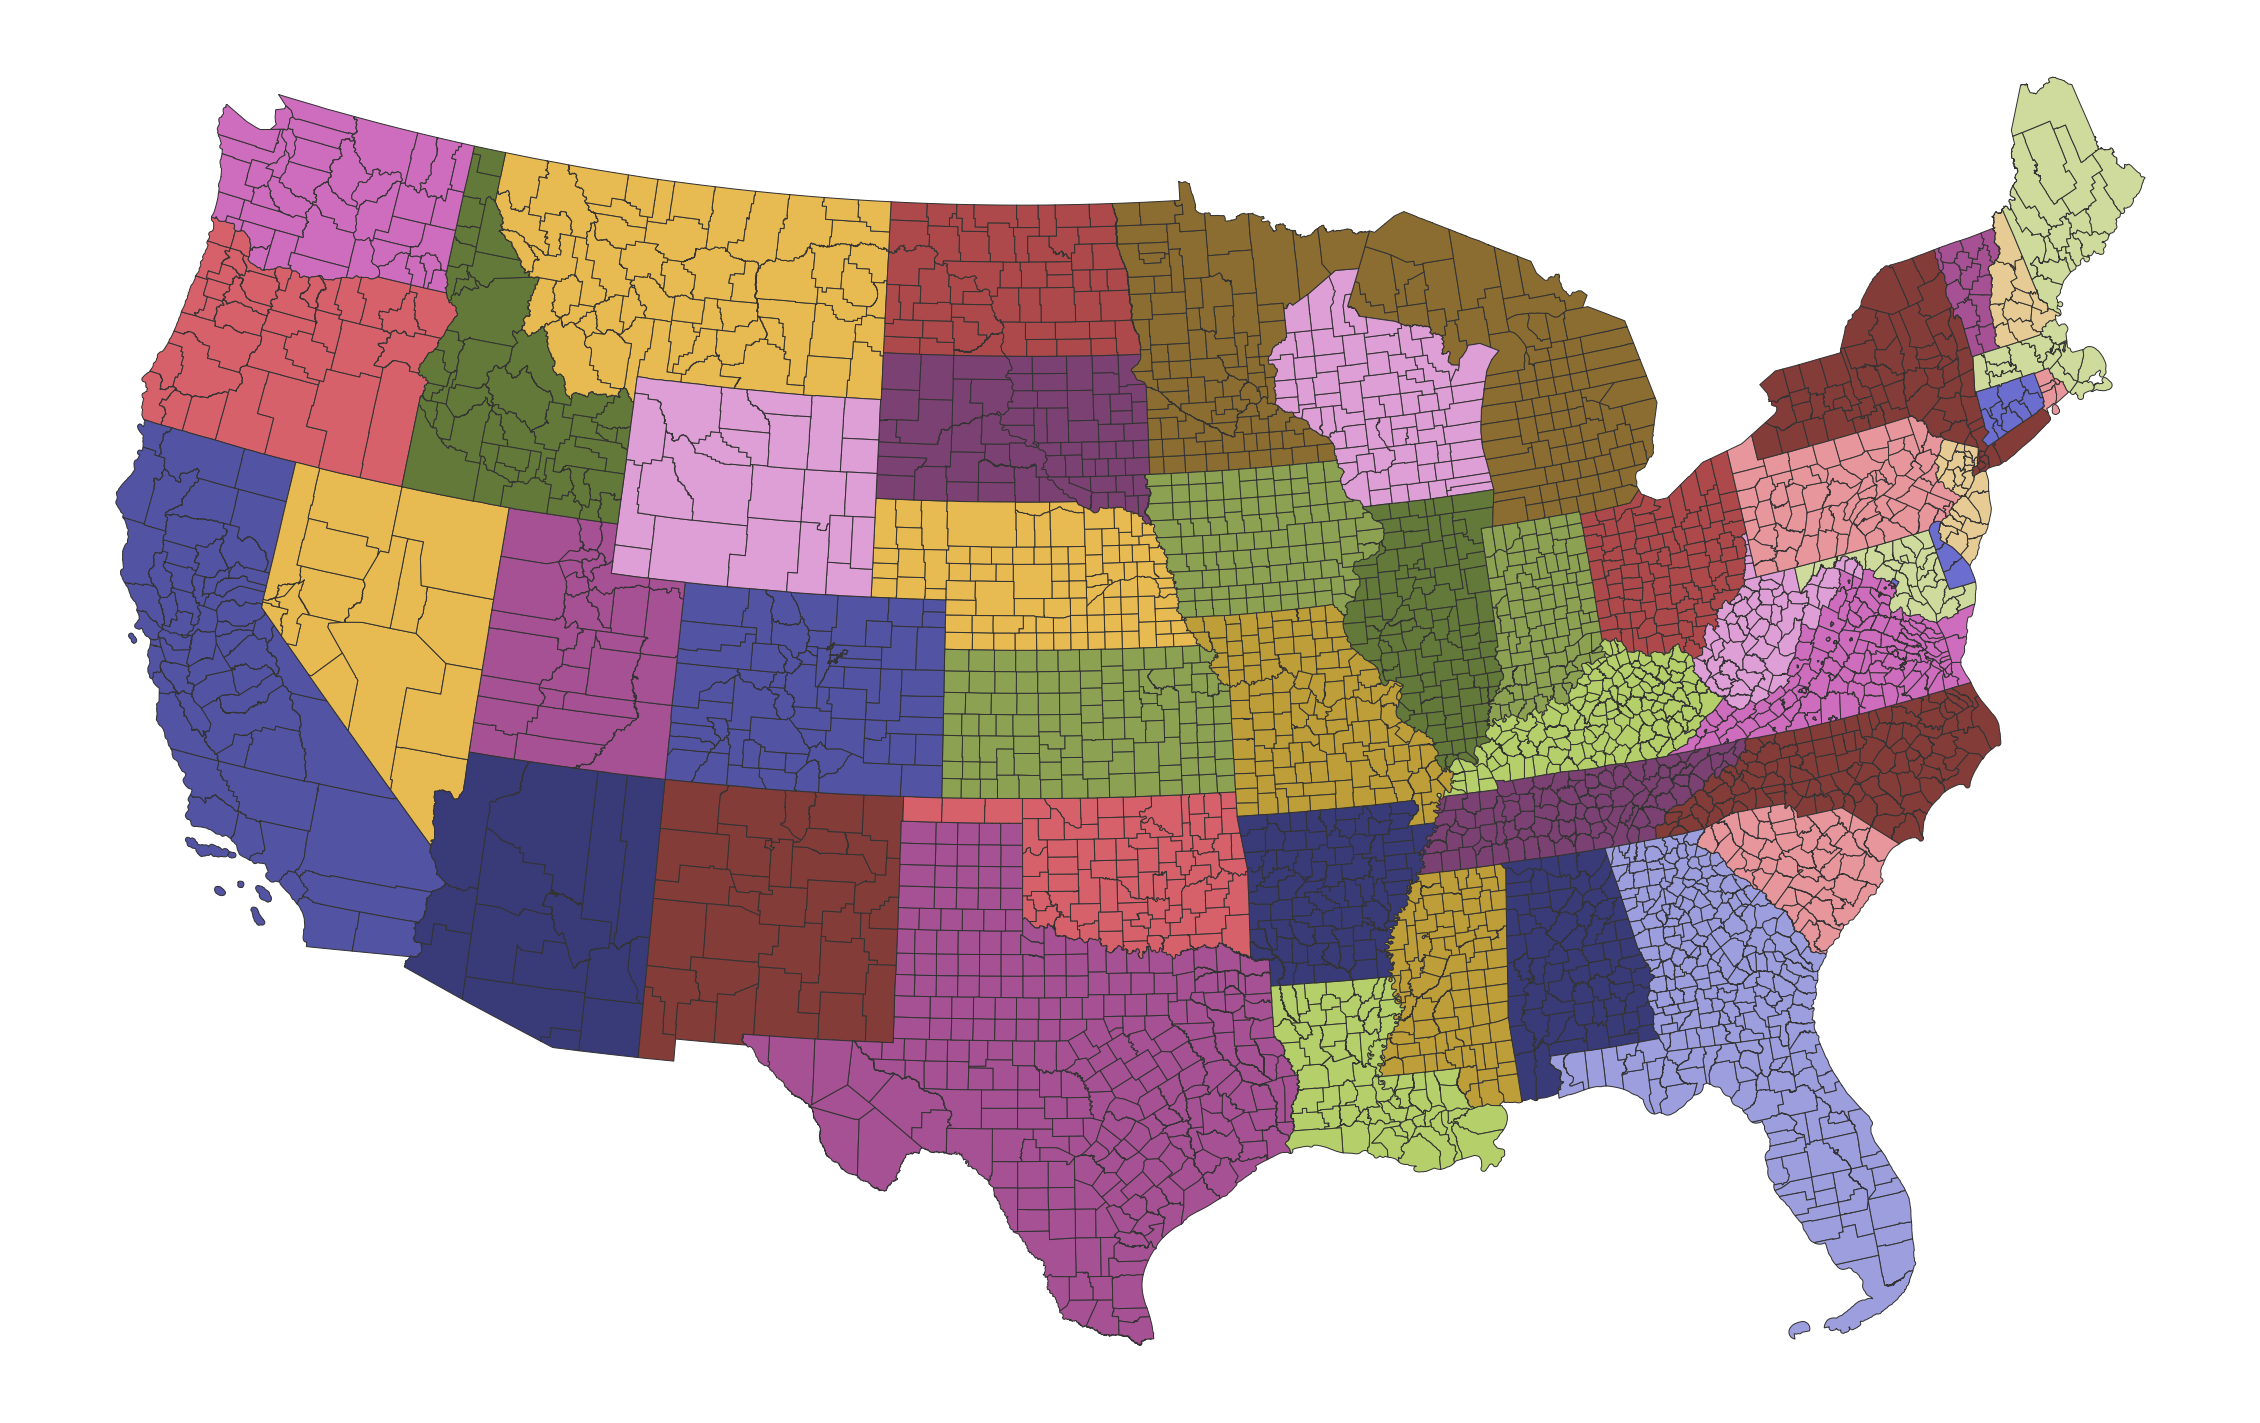

In [51]:
continental_gdf.plot(figsize=(20, 40), column="STATEFP", cmap="tab20b", edgecolor="0.2", linewidth=0.5)
plt.axis("off")
plt.show()

In [39]:
ny_county_gdf = continental_gdf[continental_gdf.STATEFP == "36"]

In [54]:
ny_county_gdf

STATEFP COUNTYFP  COUNTYNS         GEOIDFQ         NAME  \
GEOID                                                           
36101      36      101  00974148  0500000US36101      Steuben   
36091      36      091  00974143  0500000US36091     Saratoga   
36003      36      003  00974100  0500000US36003     Allegany   
36075      36      075  00974136  0500000US36075       Oswego   
36111      36      111  00974153  0500000US36111       Ulster   
...       ...      ...       ...             ...          ...   
36051      36      051  00974124  0500000US36051   Livingston   
36025      36      025  00974111  0500000US36025     Delaware   
36071      36      071  00974134  0500000US36071       Orange   
36093      36      093  00974144  0500000US36093  Schenectady   
36005      36      005  00974101  0500000US36005        Bronx   

                 NAMELSAD LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT  \
GEOID                                                                          
36101      Steuben County   06      H1  G4020   236  18500     None        A   
36091     Saratoga County   06      H1  G4020   104  10580     None        A   
36003     Allegany County   06      H1  G4020  None   None     None        A   
36075       Oswego County   06      H1  G4020   532  45060     None        A   
36111       Ulster County   06      H1  G4020   408  28740     None        A   
...                   ...  ...     ...    ...   ...    ...      ...      ...   
36051   Livingston County   06      H1  G4020   464  40380     None        A   
36025     Delaware County   06      H1  G4020  None   None     None        A   
36071       Orange County   06      H1  G4020   408  28880     None        A   
36093  Schenectady County   06      H1  G4020   104  10580     None        A   
36005        Bronx County   06      H6  G4020   408  35620    35614        C   

            ALAND     AWATER     INTPTLAT      INTPTLON  \
GEOID                                                     
36101  3601403378   35034921  +42.2667252  -077.3855253   
36091  2097812305   87488004  +43.1061353  -073.8553872   
36003  2666410173   12989704  +42.2478532  -078.0261531   
36075  2464685608  933435238  +43.4614431  -076.2092618   
36111  2911757764   94596810  +41.9472124  -074.2654582   
...           ...        ...          ...           ...   
36051  1635976564   22076449  +42.7290418  -077.7784630   
36025  3736306657   64163829  +42.1939865  -074.9667281   
36071  2103272844   67953621  +41.4024096  -074.3062522   
36093   530089711   12366944  +42.8175516  -074.0435592   
36005   109235672   39353304  +40.8487111  -073.8529390   

                                                geometry  
GEOID                                                     
36101  POLYGON ((1863679.495 -69943.717, 1862846.152 ...  
36091  POLYGON ((2097657.278 111500.074, 2097654.483 ...  
36003  POLYGON ((1773035.415 -35352.294, 1773048.206 ...  
36075  POLYGON ((1892479.108 138751.855, 1892877.792 ...  
36111  POLYGON ((2095324.049 13879.747, 2095324.485 1...  
...                                                  ...  
36051  POLYGON ((1801919.430 -20000.561, 1801860.944 ...  
36025  POLYGON ((2050173.163 -4427.702, 2050131.753 -...  
36071  POLYGON ((2098729.677 -43376.820, 2098759.488 ...  
36093  POLYGON ((2085945.164 89942.224, 2085425.640 8...  
36005  POLYGON ((2147360.035 -112662.361, 2147363.976...  

[62 rows x 18 columns]

/opt/anaconda3/envs/mggg/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


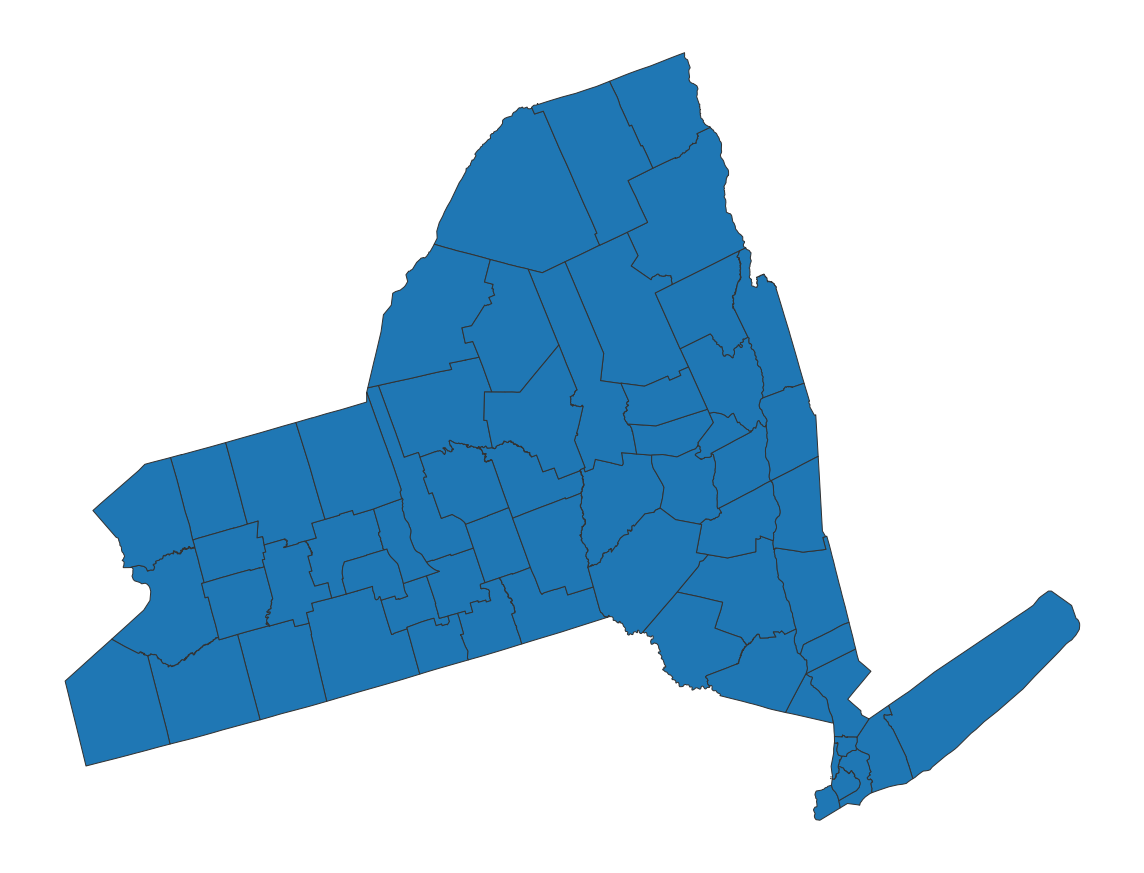

In [53]:
ny_county_gdf.plot(figsize=(10, 20), edgecolor="0.2", linewidth=0.5)
plt.axis("off")
plt.show()

## The Census central spine

![U.S. Census central spine (source: University of Missouri)](https://mcdc.missouri.edu/geography/sumlevs/censusgeochart.png)

In [140]:
ny_cousub_gdf = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2024/COUSUB/tl_2024_36_cousub.zip").set_index("GEOID").to_crs("EPSG:2163")

In [141]:
ny_cousub_gdf

STATEFP COUNTYFP COUSUBFP  COUSUBNS              GEOIDFQ  \
GEOID                                                                 
3601755959      36      017    55959  00979335  0600000US3601755959   
3601757507      36      017    57507  00979360  0600000US3601757507   
3601758288      36      017    58288  00979370  0600000US3601758288   
3601759817      36      017    59817  00979398  0600000US3601759817   
3601766894      36      017    66894  00979490  0600000US3601766894   
...            ...      ...      ...       ...                  ...   
3603332314      36      033    32314  00979050  0600000US3603332314   
3603304319      36      033    04319  00978708  0600000US3603304319   
3603307278      36      033    07278  00978742  0600000US3603307278   
3603308213      36      033    08213  00978752  0600000US3603308213   
3603311165      36      033    11165  00978765  0600000US3603311165   

                    NAME           NAMELSAD LSAD CLASSFP  MTFCC FUNCSTAT  \
GEOID                                                                      
3601755959        Oxford        Oxford town   43      T1  G4040        A   
3601757507     Pharsalia     Pharsalia town   43      T1  G4040        A   
3601758288       Pitcher       Pitcher town   43      T1  G4040        A   
3601759817       Preston       Preston town   43      T1  G4040        A   
3601766894     Sherburne     Sherburne town   43      T1  G4040        A   
...                  ...                ...  ...     ...    ...      ...   
3603332314  Harrietstown  Harrietstown town   43      T1  G4040        A   
3603304319        Bangor        Bangor town   43      T1  G4040        A   
3603307278        Bombay        Bombay town   43      T1  G4040        A   
3603308213      Brighton      Brighton town   43      T1  G4040        A   
3603311165         Burke         Burke town   43      T1  G4040        A   

                ALAND    AWATER     INTPTLAT      INTPTLON  \
GEOID                                                        
3601755959  155563470    911062  +42.3970735  -075.5962276   
3601757507  100533127    774336  +42.5976196  -075.7338789   
3601758288   73723906     37391  +42.5875820  -075.8279559   
3601759817   89940325    830446  +42.5033261  -075.6103565   
3601766894  112803620     51669  +42.6939737  -075.4812144   
...               ...       ...          ...           ...   
3603332314  510099444  43225963  +44.2180460  -074.2065725   
3603304319  111676043         0  +44.8375051  -074.4301394   
3603307278   92573863    324932  +44.9093123  -074.5839521   
3603308213  201749734  13209928  +44.4694987  -074.2473336   
3603311165  115022930         0  +44.9261764  -074.1820738   

                                                     geometry  
GEOID                                                          
3601755959  POLYGON ((1961875.504 4567.571, 1961895.797 45...  
3601757507  POLYGON ((1944260.143 29128.119, 1944618.457 2...  
3601758288  POLYGON ((1937635.589 27005.517, 1937685.562 2...  
3601759817  POLYGON ((1956840.801 22763.914, 1956855.885 2...  
3601766894  POLYGON ((1959849.949 45897.012, 1959935.360 4...  
...                                                       ...  
3603332314  POLYGON ((1996086.437 236426.265, 1996112.137 ...  
3603304319  POLYGON ((1967535.798 301764.769, 1967545.280 ...  
3603307278  POLYGON ((1951150.319 304600.919, 1951156.529 ...  
3603308213  POLYGON ((1991593.423 270291.121, 1992271.175 ...  
3603311165  POLYGON ((1982705.141 319659.927, 1983783.039 ...  

[1023 rows x 16 columns]

/opt/anaconda3/envs/mggg/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


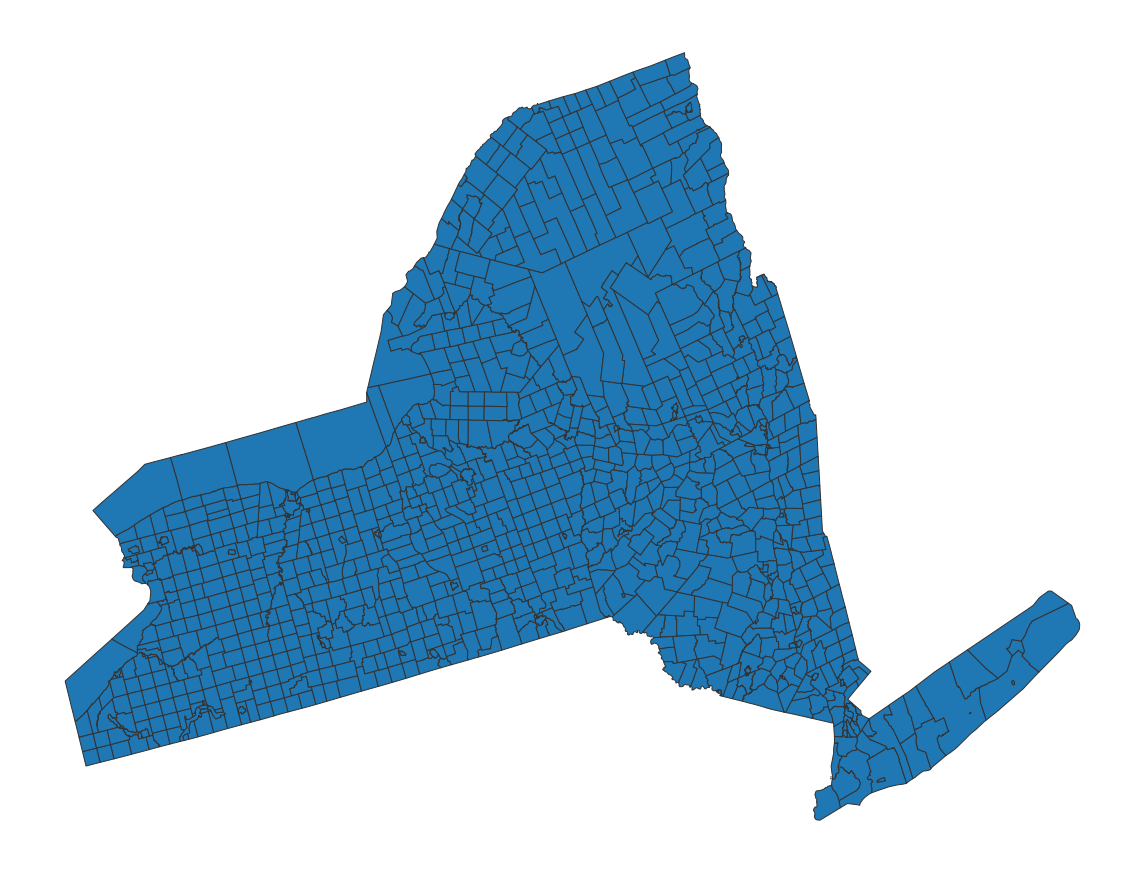

In [142]:
ny_cousub_gdf.plot(figsize=(10, 20), edgecolor="0.2", linewidth=0.5)
plt.axis("off")
plt.show()

In [61]:
ny_tract_gdf = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2024/TRACT/tl_2024_36_tract.zip").set_index("GEOID").to_crs("EPSG:2163")

In [62]:
ny_tract_gdf

STATEFP COUNTYFP TRACTCE               GEOIDFQ     NAME  \
GEOID                                                                 
36093033102      36      093  033102  1400000US36093033102   331.02   
36093020102      36      093  020102  1400000US36093020102   201.02   
36093032504      36      093  032504  1400000US36093032504   325.04   
36081003400      36      081  003400  1400000US36081003400       34   
36081003900      36      081  003900  1400000US36081003900       39   
...             ...      ...     ...                   ...      ...   
36027130004      36      027  130004  1400000US36027130004  1300.04   
36027050104      36      027  050104  1400000US36027050104   501.04   
36119014500      36      119  014500  1400000US36119014500      145   
36061016900      36      061  016900  1400000US36061016900      169   
36061016400      36      061  016400  1400000US36061016400      164   

                         NAMELSAD  MTFCC FUNCSTAT      ALAND   AWATER  \
GEOID                                                                   
36093033102   Census Tract 331.02  G5020        S  183329990  3232878   
36093020102   Census Tract 201.02  G5020        S     854905        0   
36093032504   Census Tract 325.04  G5020        S   65999125  1264687   
36081003400       Census Tract 34  G5020        S     213987        0   
36081003900       Census Tract 39  G5020        S     146970        0   
...                           ...    ...      ...        ...      ...   
36027130004  Census Tract 1300.04  G5020        S   24394730   363637   
36027050104   Census Tract 501.04  G5020        S   25421604   234551   
36119014500      Census Tract 145  G5020        S    2716634    14648   
36061016900      Census Tract 169  G5020        S     180002        0   
36061016400      Census Tract 164  G5020        S     177386        0   

                INTPTLAT      INTPTLON  \
GEOID                                    
36093033102  +42.7780248  -074.1727005   
36093020102  +42.8295375  -073.9161408   
36093032504  +42.9010539  -074.0288936   
36081003400  +40.6847731  -073.8581871   
36081003900  +40.7627994  -073.9409316   
...                  ...           ...   
36027130004  +41.7909753  -073.8382016   
36027050104  +41.5929768  -073.7645636   
36119014500  +41.2850006  -073.9079663   
36061016900  +40.7851959  -073.9731196   
36061016400  +40.7877141  -073.9444744   

                                                      geometry  
GEOID                                                           
36093033102  POLYGON ((2055264.586 78050.871, 2055271.488 7...  
36093020102  POLYGON ((2082062.894 95284.550, 2082080.039 9...  
36093032504  POLYGON ((2064585.726 105492.982, 2064979.986 ...  
36081003400  POLYGON ((2159378.165 -132226.337, 2159433.986...  
36081003900  POLYGON ((2150689.280 -125953.316, 2150710.253...  
...                                                        ...  
36027130004  POLYGON ((2121123.492 -10963.120, 2121259.966 ...  
36027050104  POLYGON ((2133817.838 -34045.307, 2133863.917 ...  
36119014500  POLYGON ((2134926.190 -70391.370, 2134932.689 ...  
36061016900  POLYGON ((2147230.273 -124137.236, 2147245.626...  
36061016400  POLYGON ((2149452.365 -123156.205, 2149467.505...  

[5411 rows x 13 columns]

/opt/anaconda3/envs/mggg/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


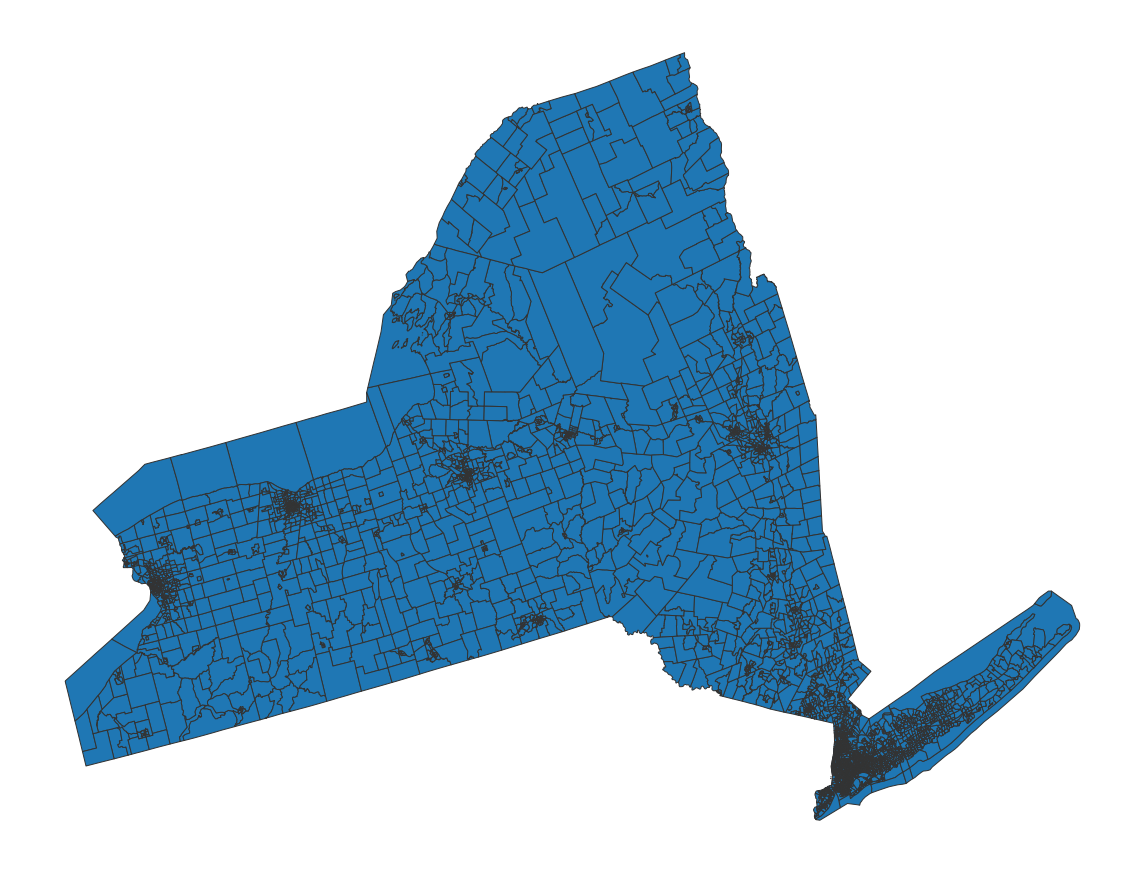

In [66]:
ny_tract_gdf.plot(figsize=(10, 20), edgecolor="0.2", linewidth=0.5)
plt.axis("off")
plt.show()

In [70]:
brooklyn_tract_gdf = ny_tract_gdf[ny_tract_gdf.COUNTYFP == "047"]

In [81]:
brooklyn_tract_gdf

STATEFP COUNTYFP TRACTCE               GEOIDFQ  NAME  \
GEOID                                                              
36047021100      36      047  021100  1400000US36047021100   211   
36047048500      36      047  048500  1400000US36047048500   485   
36047062000      36      047  062000  1400000US36047062000   620   
36047080800      36      047  080800  1400000US36047080800   808   
36047123700      36      047  123700  1400000US36047123700  1237   
...             ...      ...     ...                   ...   ...   
36047013200      36      047  013200  1400000US36047013200   132   
36047013400      36      047  013400  1400000US36047013400   134   
36047013600      36      047  013600  1400000US36047013600   136   
36047013700      36      047  013700  1400000US36047013700   137   
36047013800      36      047  013800  1400000US36047013800   138   

                      NAMELSAD  MTFCC FUNCSTAT   ALAND  AWATER     INTPTLAT  \
GEOID                                                                         
36047021100   Census Tract 211  G5020        S  271830       0  +40.6970856   
36047048500   Census Tract 485  G5020        S  581535       0  +40.7078399   
36047062000   Census Tract 620  G5020        S  319578   34799  +40.5788518   
36047080800   Census Tract 808  G5020        S  321836       0  +40.6573033   
36047123700  Census Tract 1237  G5020        S  321360       0  +40.6967384   
...                        ...    ...      ...     ...     ...          ...   
36047013200   Census Tract 132  G5020        S  155778       0  +40.6279744   
36047013400   Census Tract 134  G5020        S  268233       0  +40.6295241   
36047013600   Census Tract 136  G5020        S  214252       0  +40.6268984   
36047013700   Census Tract 137  G5020        S  152453       0  +40.6703973   
36047013800   Census Tract 138  G5020        S  162579       0  +40.6243111   

                 INTPTLON                                           geometry  
GEOID                                                                         
36047021100  -073.9719259  POLYGON ((2149833.910 -133632.831, 2150031.799...  
36047048500  -073.9363455  POLYGON ((2152528.113 -131108.635, 2152686.219...  
36047062000  -073.9460579  POLYGON ((2155966.786 -145680.844, 2156040.377...  
36047080800  -073.9394864  POLYGON ((2153831.736 -137151.752, 2154005.580...  
36047123700  -073.9567404  POLYGON ((2151373.744 -133109.624, 2151436.766...  
...                   ...                                                ...  
36047013200  -074.0156708  POLYGON ((2149268.303 -142579.047, 2149274.137...  
36047013400  -074.0202705  POLYGON ((2148560.415 -142043.573, 2148559.437...  
36047013600  -074.0225939  POLYGON ((2148562.499 -142385.587, 2148562.384...  
36047013700  -073.9853274  POLYGON ((2150138.974 -136764.021, 2150158.688...  
36047013800  -074.0255174  POLYGON ((2148567.024 -142898.967, 2148566.888...  

[805 rows x 13 columns]

TODO: show resolutions next to each other

In [ ]:
brooklyn_tract_gdf.plot(figsize=(10, 10), edgecolor="0.2", linewidth=0.5)
plt.axis("off")
plt.show()

<img width="512" alt="Brooklyn neighborhoods map" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Brooklyn_neighborhoods_map.png/512px-Brooklyn_neighborhoods_map.png?20090719024832">

(credit: <a href="https://commons.wikimedia.org/wiki/File:Brooklyn_neighborhoods_map.png">Peter Fitzgerald</a>, <a href="https://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>, via Wikimedia Commons)

(TODO: omit this for now? move to week 4? seems distracting)

In [76]:
ny_bg_gdf = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2024/BG/tl_2024_36_bg.zip").set_index("GEOID").to_crs("EPSG:2163")

In [77]:
ny_bg_gdf

STATEFP COUNTYFP TRACTCE BLKGRPCE                GEOIDFQ  \
GEOID                                                                   
360050175002      36      005  017500        2  1500000US360050175002   
360050141001      36      005  014100        1  1500000US360050141001   
360050145001      36      005  014500        1  1500000US360050145001   
360050075002      36      005  007500        2  1500000US360050075002   
360050418001      36      005  041800        1  1500000US360050418001   
...              ...      ...     ...      ...                    ...   
360050338021      36      005  033802        1  1500000US360050338021   
360050338011      36      005  033801        1  1500000US360050338011   
360050338012      36      005  033801        2  1500000US360050338012   
360050435021      36      005  043502        1  1500000US360050435021   
360870105044      36      087  010504        4  1500000US360870105044   

                   NAMELSAD  MTFCC FUNCSTAT    ALAND  AWATER     INTPTLAT  \
GEOID                                                                       
360050175002  Block Group 2  G5030        S    23694       0  +40.8296335   
360050141001  Block Group 1  G5030        S    55933       0  +40.8245444   
360050145001  Block Group 1  G5030        S    47267       0  +40.8309901   
360050075002  Block Group 2  G5030        S   109062       0  +40.8202395   
360050418001  Block Group 1  G5030        S   140793       0  +40.8989195   
...                     ...    ...      ...      ...     ...          ...   
360050338021  Block Group 1  G5030        S    46999       0  +40.8705487   
360050338011  Block Group 1  G5030        S    49211       0  +40.8687741   
360050338012  Block Group 2  G5030        S    65170       0  +40.8666620   
360050435021  Block Group 1  G5030        S  1656169    3169  +40.8895274   
360870105044  Block Group 4  G5030        S  1300403       0  +41.1904578   

                  INTPTLON                                           geometry  
GEOID                                                                          
360050175002  -073.9152037  POLYGON ((2150524.957 -117727.844, 2150601.058...  
360050141001  -073.9131209  POLYGON ((2150638.937 -118346.725, 2150678.443...  
360050145001  -073.9050832  POLYGON ((2151285.646 -117411.260, 2151293.175...  
360050075002  -073.9080678  POLYGON ((2151305.247 -118774.610, 2151303.101...  
360050418001  -073.8564428  POLYGON ((2152518.559 -109400.659, 2152562.207...  
...                    ...                                                ...  
360050338021  -073.8657440  POLYGON ((2153005.295 -112148.093, 2152979.345...  
360050338011  -073.8658013  POLYGON ((2153033.198 -112246.137, 2153090.549...  
360050338012  -073.8658807  POLYGON ((2153130.685 -112583.064, 2153089.791...  
360050435021  -073.8725845  POLYGON ((2151209.239 -110095.456, 2151198.263...  
360870105044  -074.0466055  POLYGON ((2127744.104 -83106.776, 2127758.955 ...  

[16070 rows x 13 columns]

In [78]:
brooklyn_bg_gdf = ny_bg_gdf[ny_bg_gdf.COUNTYFP == "047"]

In [79]:
brooklyn_bg_gdf

STATEFP COUNTYFP TRACTCE BLKGRPCE                GEOIDFQ  \
GEOID                                                                   
360470594031      36      047  059403        1  1500000US360470594031   
360470594032      36      047  059403        2  1500000US360470594032   
360470594042      36      047  059404        2  1500000US360470594042   
360470594041      36      047  059404        1  1500000US360470594041   
360470594043      36      047  059404        3  1500000US360470594043   
...              ...      ...     ...      ...                    ...   
360470706020      36      047  070602        0  1500000US360470706020   
360470706021      36      047  070602        1  1500000US360470706021   
360470706011      36      047  070601        1  1500000US360470706011   
360470292002      36      047  029200        2  1500000US360470292002   
360470069012      36      047  006901        2  1500000US360470069012   

                   NAMELSAD  MTFCC FUNCSTAT    ALAND  AWATER     INTPTLAT  \
GEOID                                                                       
360470594031  Block Group 1  G5030        S    64626       0  +40.5964380   
360470594032  Block Group 2  G5030        S    76076       0  +40.5941323   
360470594042  Block Group 2  G5030        S    75413       0  +40.5908487   
360470594041  Block Group 1  G5030        S    96434       0  +40.5908731   
360470594043  Block Group 3  G5030        S    42052       0  +40.5906922   
...                     ...    ...      ...      ...     ...          ...   
360470706020  Block Group 0  G5030        S        0  783671  +40.6115014   
360470706021  Block Group 1  G5030        S  1196753  111937  +40.6124441   
360470706011  Block Group 1  G5030        S   144734       0  +40.6177824   
360470292002  Block Group 2  G5030        S    47288       0  +40.5986161   
360470069012  Block Group 2  G5030        S    41248       0  +40.6866244   

                  INTPTLON                                           geometry  
GEOID                                                                          
360470594031  -073.9474106  POLYGON ((2155698.319 -143613.044, 2155735.821...  
360470594032  -073.9474463  POLYGON ((2155744.311 -143893.137, 2155814.493...  
360470594042  -073.9477886  POLYGON ((2155847.041 -144109.633, 2155917.122...  
360470594041  -073.9455877  POLYGON ((2155987.001 -144038.751, 2156057.060...  
360470594043  -073.9492328  POLYGON ((2155768.743 -144149.271, 2155847.041...  
...                    ...                                                ...  
360470706020  -073.8864190  POLYGON ((2158867.739 -139531.529, 2158993.158...  
360470706021  -073.8940807  POLYGON ((2158681.961 -140732.279, 2158717.599...  
360470706011  -073.9008931  POLYGON ((2158567.938 -140034.697, 2158610.577...  
360470292002  -073.9992018  POLYGON ((2151558.290 -144840.926, 2151618.637...  
360470069012  -073.9922454  POLYGON ((2149169.970 -135215.179, 2149172.054...  

[2156 rows x 13 columns]

/opt/anaconda3/envs/mggg/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


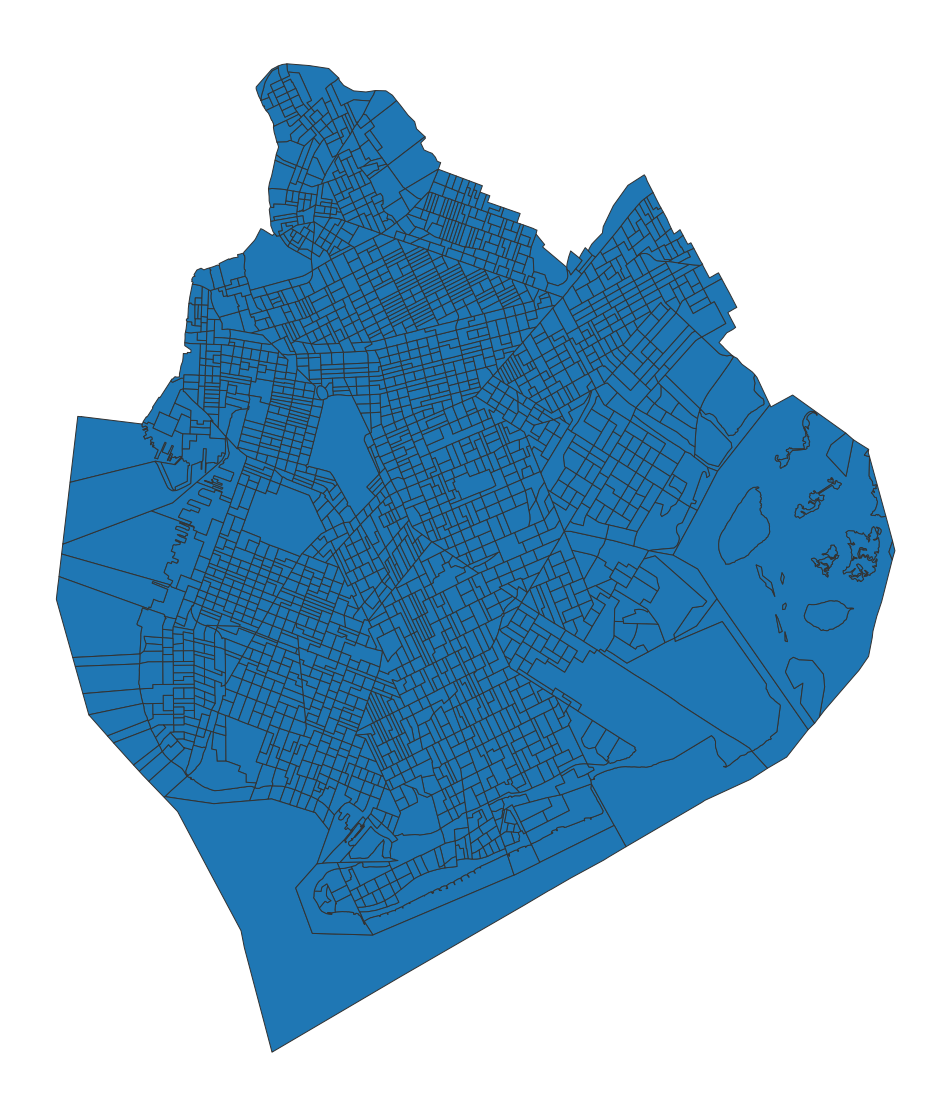

In [80]:
brooklyn_bg_gdf.plot(figsize=(10, 10), edgecolor="0.2", linewidth=0.5)
plt.axis("off")
plt.show()

## Combining geographies with tabular data

In [95]:
brooklyn_subway_usage_raw = census.acs5.get(
    (
        # Means of Transportation to Work – Total
        "B08301_001E",  
        # Means of Transportation to Work – Total – Public transportation (excluding taxicab) – Subway or elevated rail
        "B08301_012E",  
    ),
    geo={
        "for": "tract:*",
        "in": f"state:36 county:047",
    },
    year=2022,
)

In [96]:
brooklyn_subway_usage_df = pd.DataFrame(brooklyn_subway_usage_raw).rename(
    columns={
        "B08301_001E": "commuter_count",
        "B08301_012E": "subway_commuter_count",
    }
)

In [97]:
brooklyn_subway_usage_df

commuter_count  subway_commuter_count state county   tract
0            2731.0                 1108.0    36    047  000100
1             618.0                  243.0    36    047  000200
2            2219.0                  994.0    36    047  000301
3            2271.0                  734.0    36    047  000501
4            1596.0                  844.0    36    047  000502
..              ...                    ...   ...    ...     ...
800          2630.0                  939.0    36    047  122000
801          1716.0                  107.0    36    047  123700
802          1212.0                  509.0    36    047  150200
803          2126.0                  539.0    36    047  152200
804             0.0                    0.0    36    047  990100

[805 rows x 5 columns]

In [100]:
brooklyn_subway_usage_df["GEOID"] = (
    brooklyn_subway_usage_df["state"]
    + brooklyn_subway_usage_df["county"]
    + brooklyn_subway_usage_df["tract"]
)
brooklyn_subway_usage_df = brooklyn_subway_usage_df.set_index("GEOID")
brooklyn_subway_usage_df["subway_pct"] = 100 * brooklyn_subway_usage_df["subway_commuter_count"] / brooklyn_subway_usage_df["commuter_count"] 

In [102]:
brooklyn_subway_usage_df.sort_values(by=["subway_pct"])

commuter_count  subway_commuter_count state county   tract  \
GEOID                                                                     
36047070202            14.0                    0.0    36    047  070202   
36047005302            41.0                    0.0    36    047  005302   
36047053700           942.0                    0.0    36    047  053700   
36047047200           699.0                   26.0    36    047  047200   
36047070601          1176.0                   55.0    36    047  070601   
...                     ...                    ...   ...    ...     ...   
36047103402             0.0                    0.0    36    047  103402   
36047107002             0.0                    0.0    36    047  107002   
36047107003             0.0                    0.0    36    047  107003   
36047118000             0.0                    0.0    36    047  118000   
36047990100             0.0                    0.0    36    047  990100   

             subway_pct  
GEOID                    
36047070202    0.000000  
36047005302    0.000000  
36047053700    0.000000  
36047047200    3.719599  
36047070601    4.676871  
...                 ...  
36047103402         NaN  
36047107002         NaN  
36047107003         NaN  
36047118000         NaN  
36047990100         NaN  

[805 rows x 6 columns]

In [121]:
brooklyn_subway_usage_df = brooklyn_subway_usage_df[brooklyn_subway_usage_df.commuter_count > 0]

In [122]:
brooklyn_subway_usage_gdf = brooklyn_tract_gdf.join(brooklyn_subway_usage_df)

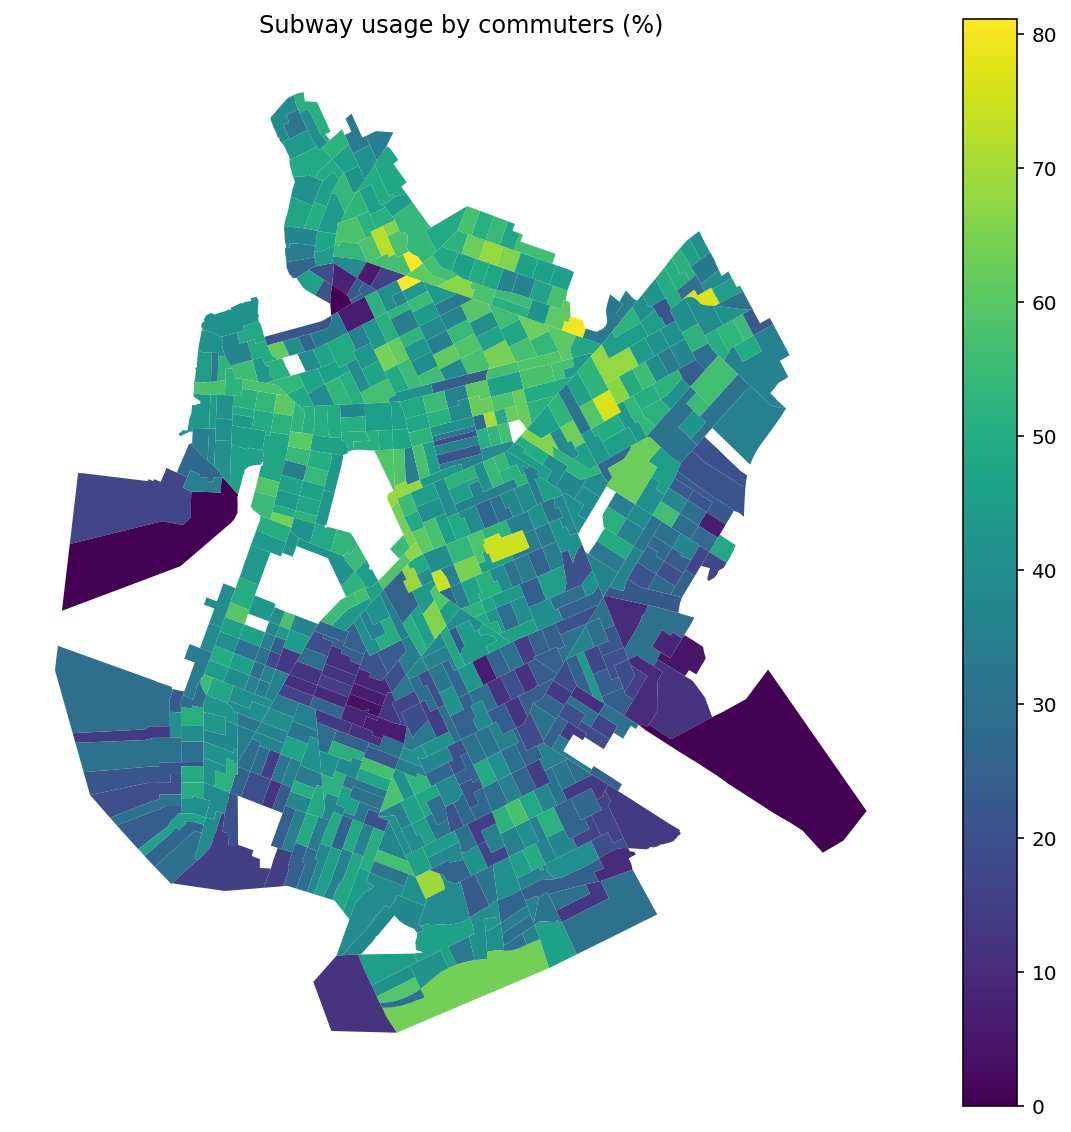

In [123]:
ax = brooklyn_subway_usage_gdf.plot(figsize=(10, 10), column="subway_pct", legend=True)
ax.axis("off")
ax.set_title("Subway usage by commuters (%)")
plt.show()

In [138]:
subway_map = folium.Map([40.65, -73.95], zoom_start=12)
folium.GeoJson(brooklyn_subway_usage_gdf).add_to(subway_map)
subway_map

In [ ]:
subway_map = folium.Map([40.65, -73.95], zoom_start=12)
folium.Choropleth(
    geo_data=brooklyn_subway_usage_gdf,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
    
    
    
    brooklyn_subway_usage_gdf
).add_to(subway_map)
subway_map